In [1]:
!pip install transformers datasets torch safetensors -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 148.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 127.2 MB/s eta 0:00:00


In [2]:
!python /content/train_bert.py --model_name "prajjwal1/bert-tiny" --dataset agnews --dsn \
   --seed 0 --num_epochs 10 --batch_size 32 --max_len 512 --lr 1e-5 \
   --hidden_dropout_prob 0.1 --attention_probs_dropout_prob 0.1 \
   --model_save_location ./model_output_AGNEWS_baseline --early_stopping --early_stopping_patience 6 \
   --early_stopping_threshold 0.0 --save_steps 500 --evaluation_strategy epoch \
   --save_strategy epoch --save_total_limit 2 --metric_for_best_model eval_accuracy \
   --greater_is_better True --scheduler_type linear --scheduler_patience 2 \
   --scheduler_factor 0.5 --scheduler_min_lr 1e-7

2025-10-30 18:55:50.909868: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-30 18:55:50.927328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761850550.948381    4013 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761850550.954878    4013 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761850550.971246    4013 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
# First, uninstall standard transformers
!pip uninstall transformers -y -q

# Clone and install PerforatedAI-Transformers
!git clone https://github.com/PerforatedAI/PerforatedAI-Transformers.git
!cd PerforatedAI-Transformers && pip install -e . -q

# Install PerforatedAI
!pip install perforatedai -q

fatal: destination path 'PerforatedAI-Transformers' already exists and is not an empty directory.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for transformers (pyproject.toml) ... done


In [4]:
!CUDA_VISIBLE_DEVICES=0 python /content/train_bert_pai.py --model_name "prajjwal1/bert-tiny" --dataset agnews --pai_save_name my_pai_run --switch_mode DOING_HISTORY --n_epochs_to_switch 10 --history_lookback 1 --max_dendrites 5 --improvement_threshold 0.0005 --pb_improvement_threshold 0.01 --pb_improvement_threshold_raw 0.001 --unwrapped_modules_confirmed True --seed 0 --num_epochs 10 --batch_size 64 --max_len 128 --lr 2e-5 --hidden_dropout_prob 0.1 --attention_probs_dropout_prob 0.1 --model_save_location ./model_output_PAI_AGNEWS --early_stopping --early_stopping_patience 3 --early_stopping_threshold 0.0 --evaluation_strategy epoch --save_strategy epoch --save_total_limit 5 --metric_for_best_model eval_accuracy --greater_is_better True --scheduler_type linear --scheduler_patience 2 --scheduler_factor 0.5 --scheduler_min_lr 1e-7 --maximizing_score False

2025-10-30 19:00:12.568336: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-30 19:00:12.585910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761850812.607127    5268 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761850812.613543    5268 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761850812.629931    5268 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 6 PAI graphs:

Displaying: my_pai_run.png


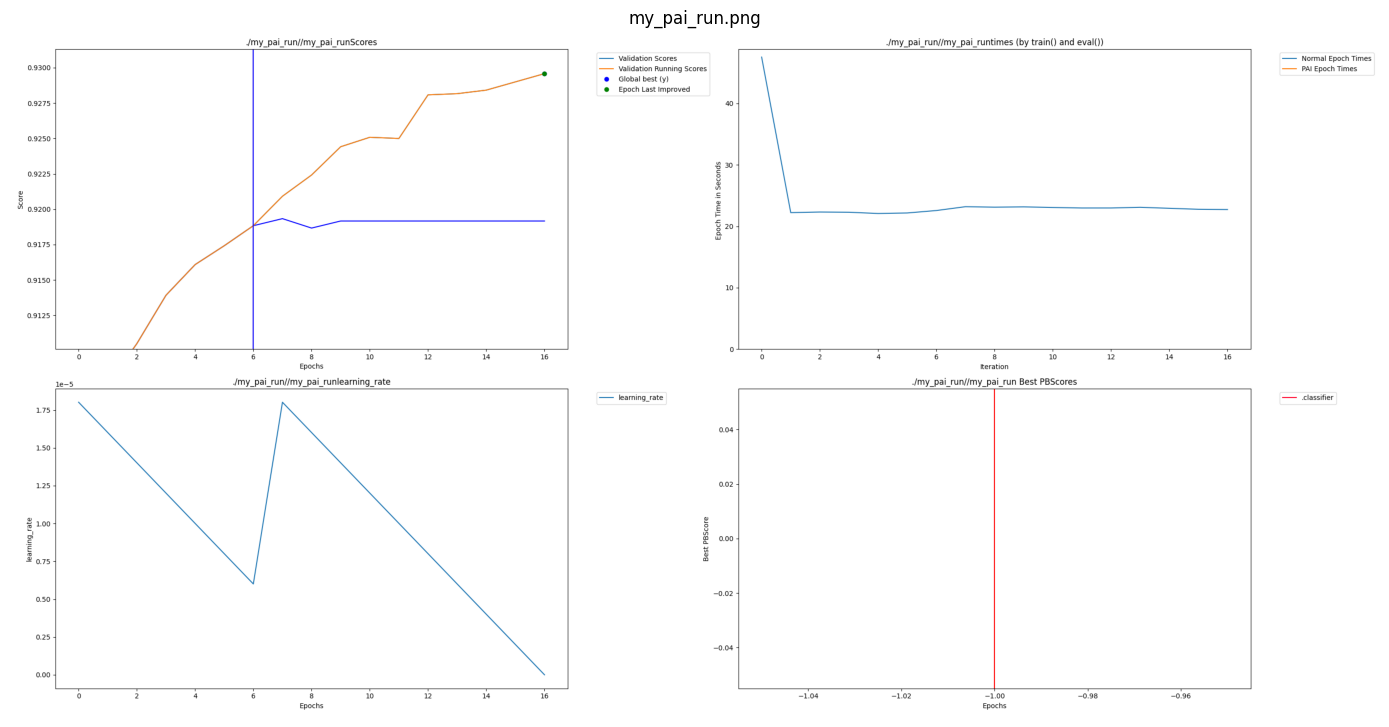



Displaying: my_pai_run_30.10.2025.19.19.50_noImprove_lr_0.png


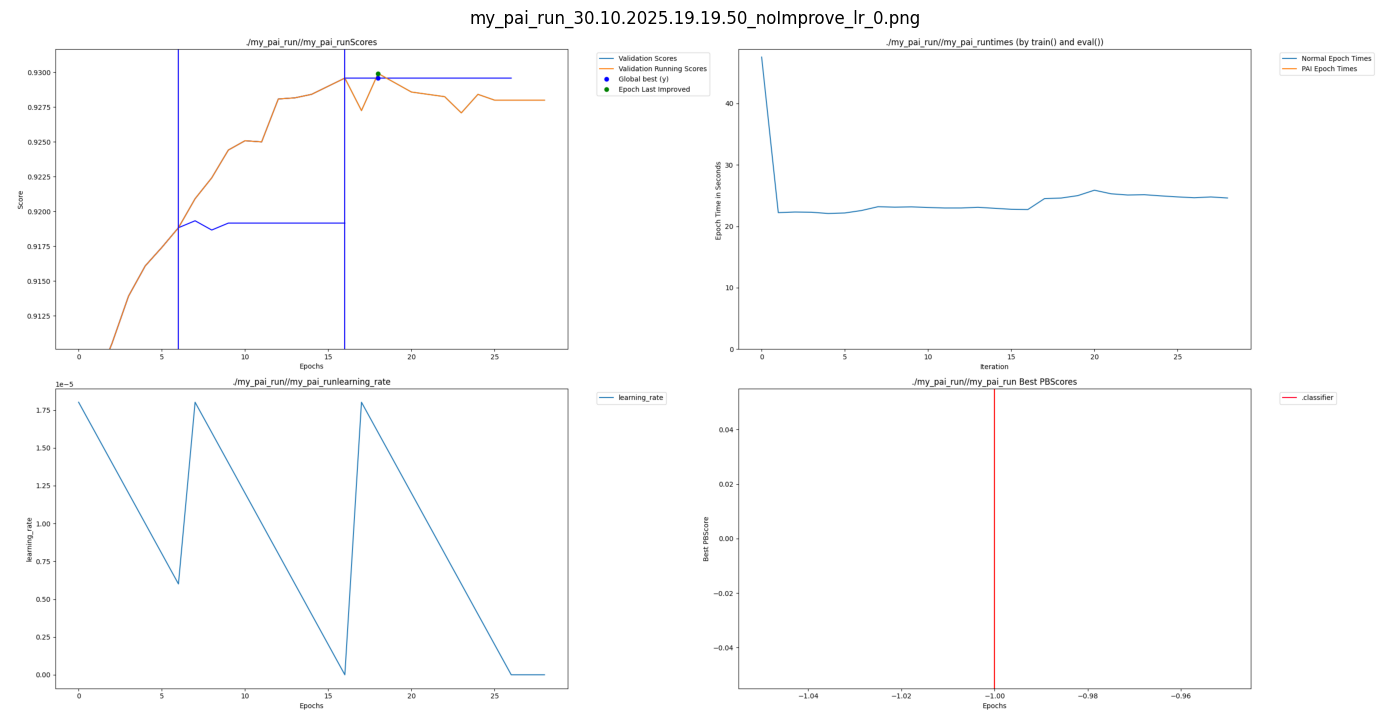



Displaying: my_pai_run_30.10.2025.19.25.14_noImprove_lr_0.png


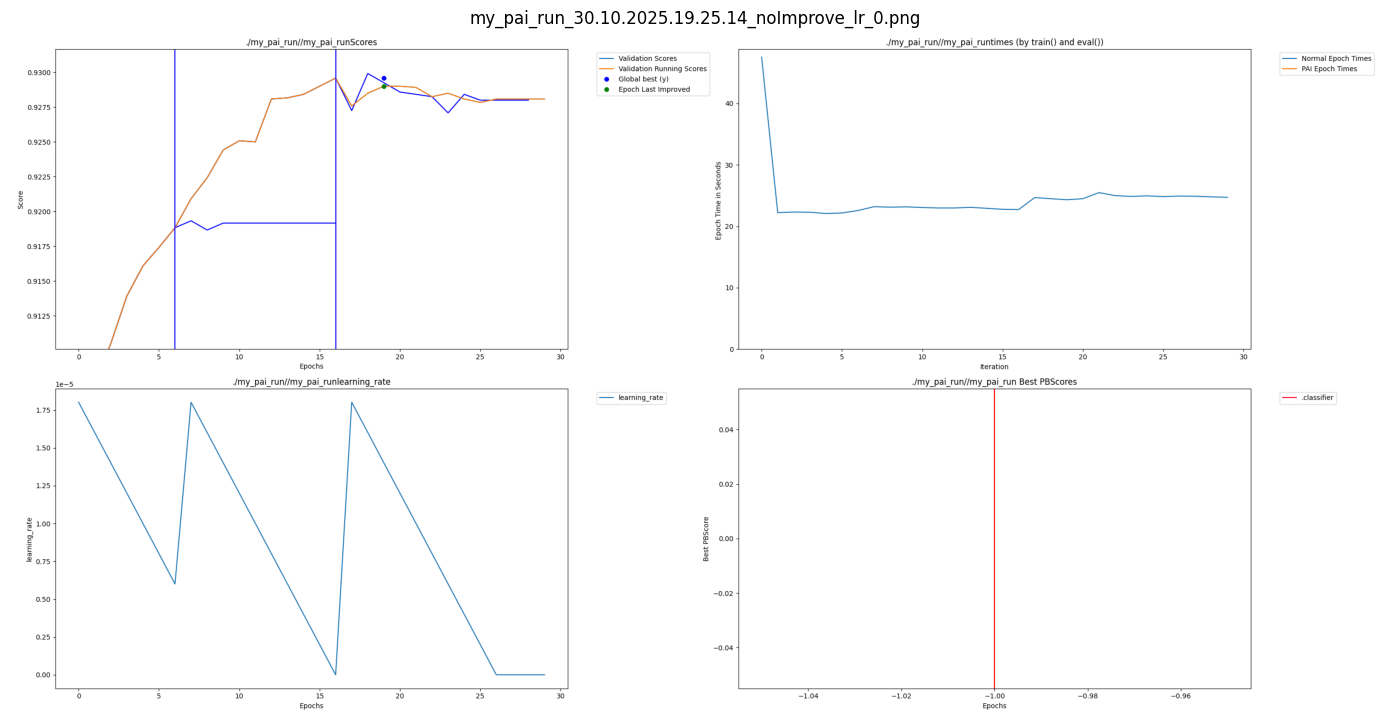



Displaying: my_pai_run_30.10.2025.19.30.43_noImprove_lr_0.png


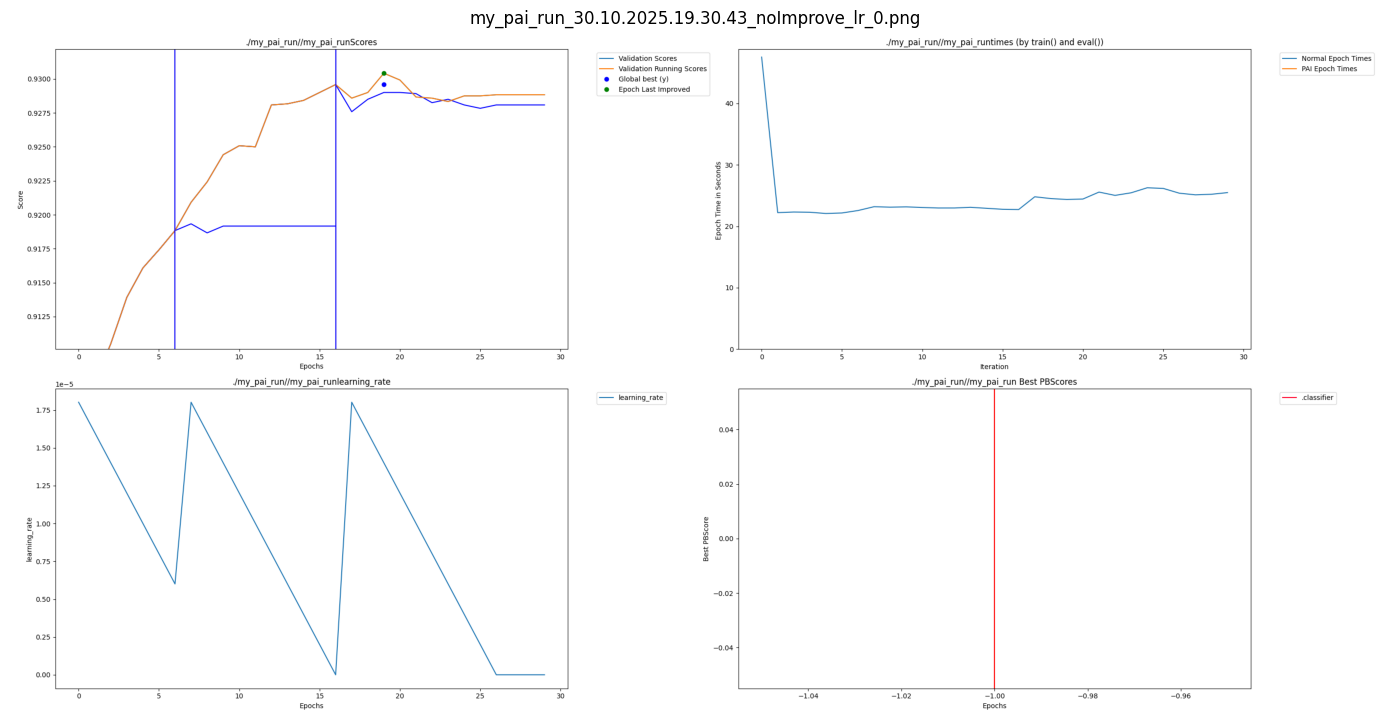



Displaying: my_pai_run_beforeSwitch_0.png


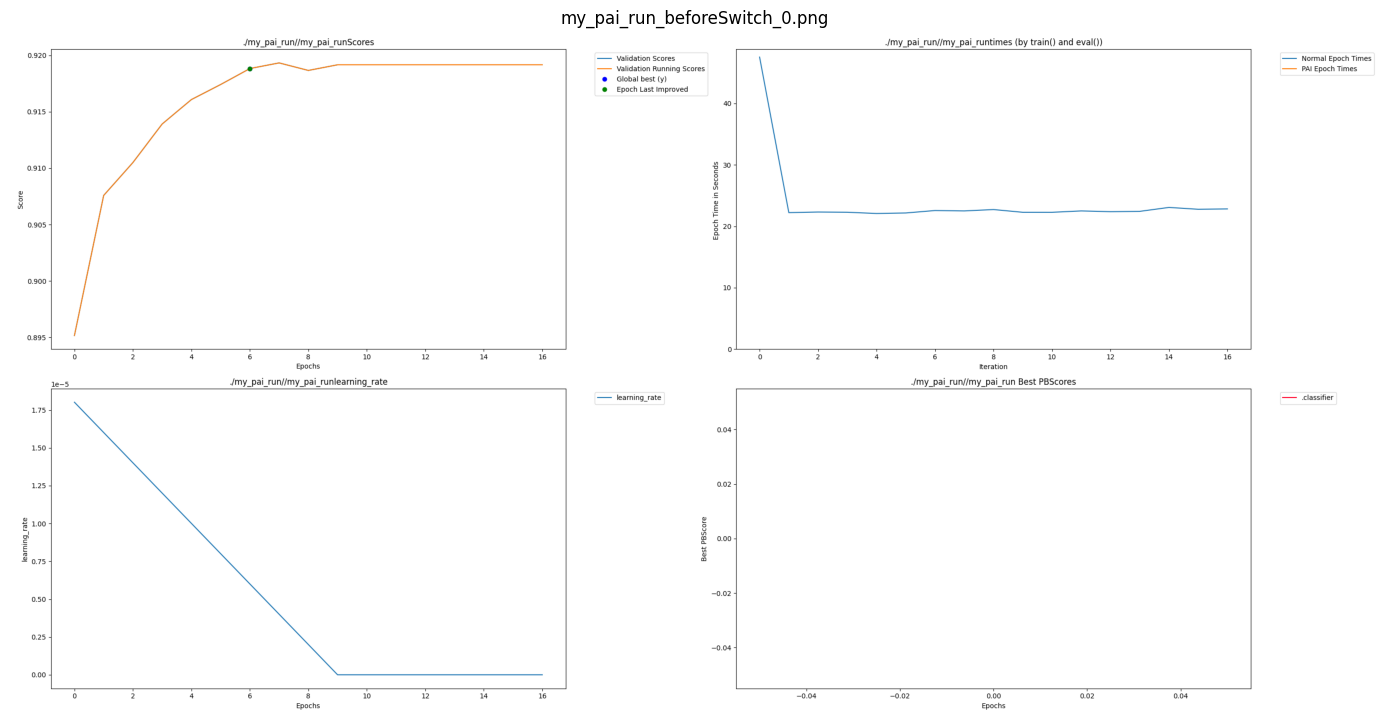



Displaying: my_pai_run_beforeSwitch_2.png


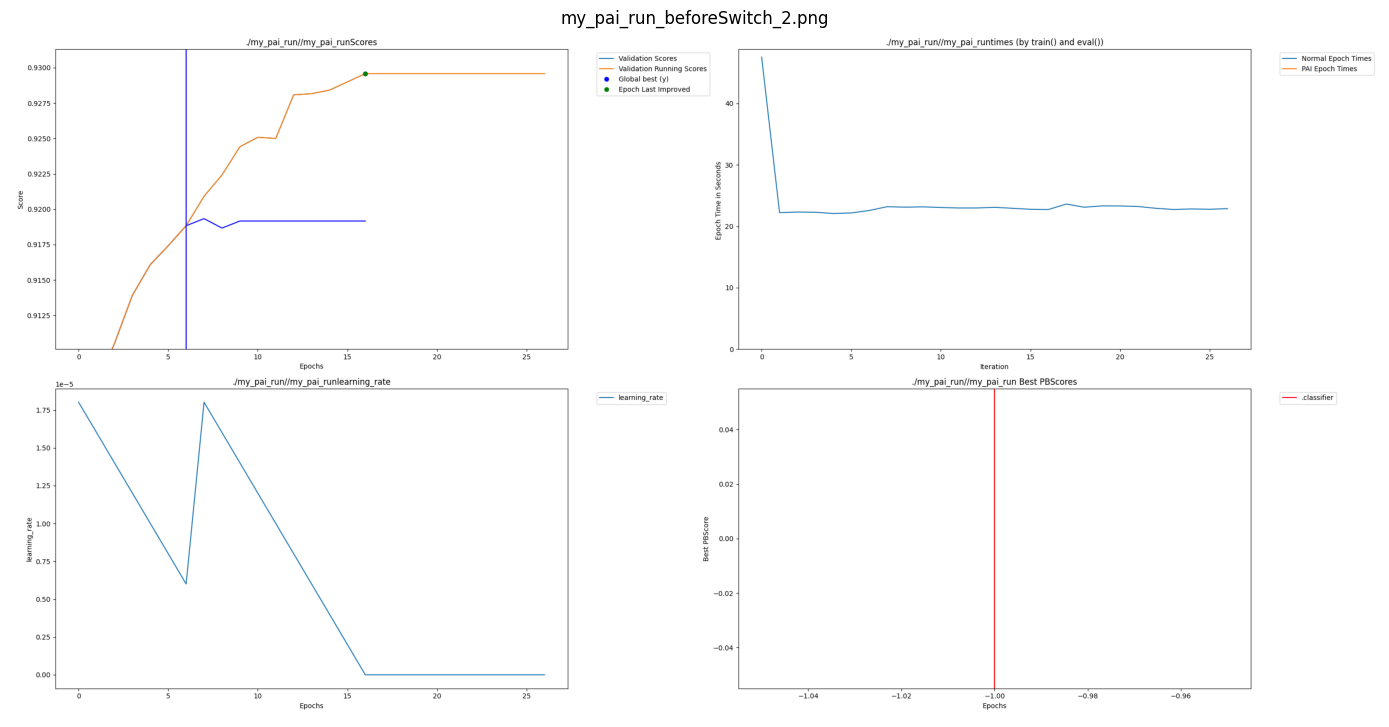

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

pai_folder = 'my_pai_run'
png_files = sorted(glob.glob(f"{pai_folder}/*.png"))

if png_files:
    print(f"Found {len(png_files)} PAI graphs:\n")
    for png_file in png_files:
        print(f"Displaying: {os.path.basename(png_file)}")
        img = Image.open(png_file)
        plt.figure(figsize=(14, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(png_file))
        plt.tight_layout()
        plt.show()
        print("\n" + "="*60 + "\n")
else:
    print(f"No graphs found in {pai_folder}/")